# Assignment 2

## Pandas

In [1]:
import numpy as np
import pandas as pd

## 1.

In [2]:
np.random.seed(0)
valuesArray = np.random.randint(100, size=(26,1))
indexArray = pd.Index([chr(i) for i in range(97,123)])
df = pd.DataFrame(data=valuesArray, index=indexArray)
df.head()

,0
a,44
b,47
c,64
d,67
e,67


## 2.

In [3]:
x = [1,2,3,4,7,11]
y = [4,5,6,9,5,0]
z = [7,5,8,12,1,11]
df = pd.DataFrame(data=list(zip(x,y,z)), columns=['col1', 'col2', 'col3'])
df

,col1,col2,col3
0,1,4,7
1,2,5,5
2,3,6,8
3,4,9,12
4,7,5,1
5,11,0,11


In [4]:
tempResult = pd.Series(df.iloc[:,0])
print(tempResult)
print(type(tempResult))

0     1
1     2
2     3
3     4
4     7
5    11
Name: col1, dtype: int64
<class 'pandas.core.series.Series'>


## 3.

In [5]:
df

,col1,col2,col3
0,1,4,7
1,2,5,5
2,3,6,8
3,4,9,12
4,7,5,1
5,11,0,11


### 3.1.

In [6]:
df.iloc[:, :-1]

,col1,col2
0,1,4
1,2,5
2,3,6
3,4,9
4,7,5
5,11,0


### 3.2.

In [7]:
df_temp = df.drop(index=df.iloc[:3, :].index.tolist(), inplace=False)
df_temp

,col1,col2,col3
3,4,9,12
4,7,5,1
5,11,0,11


### 3.3.

In [8]:
df_temp = df.drop(index=df.iloc[-3:, :].index.tolist(), inplace=False)
df_temp

,col1,col2,col3
0,1,4,7
1,2,5,5
2,3,6,8


## 4.

In [9]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

### 4.1.

In [10]:
intersect = pd.Series(np.intersect1d(ser1, ser2))
ser1[~ser1.isin(intersect)]

0    1
1    2
2    3
dtype: int64

### 4.2.

In [11]:
temp1 = pd.Series(np.union1d(ser1, ser2))
temp2 = pd.Series(np.intersect1d(ser1, ser2))
temp1[~temp1.isin(temp2)]

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64

## 5.

In [12]:
p1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p2 = pd.Series([8, 9, 10, 11, 12, 7, 6, 5, 4, 3])

### 5.1. Formula

In [13]:
np.sqrt(np.sum([np.square(x - y) for x,y in zip(p1,p2)]))

18.16590212458495

### 5.2. Built in function

In [14]:
np.linalg.norm(p1 - p2)

18.16590212458495

## 6.

In [15]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))
df

,p,q,r,s
a,52,93,15,72
b,61,21,83,87
c,75,75,88,24
d,3,22,53,2
e,88,30,38,2
f,64,60,21,33
g,76,58,22,89
h,49,91,59,42
i,92,60,80,15
j,62,62,47,62


In [16]:
print(np.linalg.norm(df.loc['i'] - df.loc['a']))
print(np.linalg.norm(df.loc['i'] - df.loc['d']))

100.81170566953026
101.3064657363981


In [17]:
target = np.array([])
targetIndex = np.array([])
for i in range(len(df.index)):
    minDist = -1
    lowindex = -1
    for j in range(len(df.index)):
        if( i != j):
            temp = np.linalg.norm(df.iloc[i] - df.iloc[j])        
            if(temp > minDist):
                minDist = temp
                lowindex = j
    targetIndex = np.append(targetIndex, lowindex)
    target = np.append(target, minDist)

In [18]:
targetIndex = targetIndex + 97
targetIndex = targetIndex.astype(int)
targetIndex = [chr(i) for i in targetIndex]

In [19]:
df['farthest_row'] = targetIndex
df['dist'] = target

In [20]:
df

,p,q,r,s,farthest_row,dist
a,52,93,15,72,d,117.413798
b,61,21,83,87,d,107.191418
c,75,75,88,24,d,98.498731
d,3,22,53,2,g,123.105646
e,88,30,38,2,a,103.411798
f,64,60,21,33,b,91.049437
g,76,58,22,89,d,123.105646
h,49,91,59,42,d,92.265920
i,92,60,80,15,d,101.306466
j,62,62,47,62,d,93.364876


## 7.

In [21]:
 L = pd.Series(range(15))

In [22]:
x = np.array(L, dtype='int32')

In [23]:
number_of_rows = (int)(np.floor((len(x) - 4)/2 + 1))
number_of_columns = 4
shape = (number_of_rows, number_of_columns)

In [24]:
stepRow = 4 * 2
stepCol = 4
stride_steps = (stepRow, stepCol)
np.lib.stride_tricks.as_strided(x, shape, stride_steps)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

## 8.

In [25]:
df = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


### 8.1.

In [26]:
df = df.reindex(columns=['c','b','a','d','e'])
df

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


### 8.2.

In [27]:
type(df.columns)

pandas.core.indexes.base.Index

In [28]:
def interchangeColumns(df, col1, col2):
    temp = df.columns.tolist()
    index1 = -1
    index2 = -1
    for i in range(len(df.columns)):
        if(temp[i] == col1):
            index1 = i
        if(temp[i] == col2):
            index2 = i
    temp[index1], temp[index2] = temp[index2], temp[index1]
    temp = pd.Series(temp)
    return pd.DataFrame(df, columns=temp)

   

In [29]:
df = interchangeColumns(df, 'b', 'd')
df

,c,d,a,b,e
0,2,3,0,1,4
1,7,8,5,6,9
2,12,13,10,11,14
3,17,18,15,16,19


### 8.3.

In [30]:
 temp = df.columns.tolist()
 temp = sorted(temp, reverse=True)
 temp = pd.Series(temp)
 df_new = pd.DataFrame(df, columns=temp)
 df_new

,e,d,c,b,a
0,4,3,2,1,0
1,9,8,7,6,5
2,14,13,12,11,10
3,19,18,17,16,15


## 9.

In [31]:
df = pd.read_csv('BostonHousing.csv', header=0)
df.iloc[::50, :]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0,0.871,6.122,97.3,1.6180,5,403,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0,0.431,6.487,13.0,7.3967,7,330,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4


## 10.

In [32]:
df = pd.read_csv('BostonHousing.csv', header=0)
df['medv'] = np.where(df['medv'] > 25, 'High', 'Low')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,Low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,Low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,Low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,Low


## 11. Not clear

## 2 approaches made as the question is not clear enough

## Approach 1

In [33]:
date = np.array('2021-01-01', dtype=np.datetime64)
date

array('2021-01-01', dtype='datetime64[D]')

In [34]:
date = pd.Series(date + pd.to_timedelta(np.arange(10), 'W'))
date

0   2021-01-01
1   2021-01-08
2   2021-01-15
3   2021-01-22
4   2021-01-29
5   2021-02-05
6   2021-02-12
7   2021-02-19
8   2021-02-26
9   2021-03-05
dtype: datetime64[ns]

In [35]:
np.random.seed(0)
df = pd.Series(data=np.random.randn(10), index=date)
df

2021-01-01    1.764052
2021-01-08    0.400157
2021-01-15    0.978738
2021-01-22    2.240893
2021-01-29    1.867558
2021-02-05   -0.977278
2021-02-12    0.950088
2021-02-19   -0.151357
2021-02-26   -0.103219
2021-03-05    0.410599
dtype: float64

## Approach 2

In [36]:
from dateutil import parser
date = parser.parse("2021-01-01")
date

datetime.datetime(2021, 1, 1, 0, 0)

In [37]:
date.strftime('%A')

'Friday'

In [38]:
date = np.array(np.datetime64(date), dtype=np.datetime64)
date

array('2021-01-01T00:00:00.000000', dtype='datetime64[us]')

In [39]:
newDate = date + np.timedelta64(1, 'D')
newDate = newDate + pd.to_timedelta(np.arange(10), 'W')
newDate = np.concatenate((date, newDate), axis=None)
newDate = pd.to_datetime(newDate)
newDate

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-09', '2021-01-16',
               '2021-01-23', '2021-01-30', '2021-02-06', '2021-02-13',
               '2021-02-20', '2021-02-27', '2021-03-06'],
              dtype='datetime64[ns]', freq=None)

In [40]:
np.random.seed(0)
df = pd.Series(data=np.random.randn(11), index=newDate)
df

2021-01-01    1.764052
2021-01-02    0.400157
2021-01-09    0.978738
2021-01-16    2.240893
2021-01-23    1.867558
2021-01-30   -0.977278
2021-02-06    0.950088
2021-02-13   -0.151357
2021-02-20   -0.103219
2021-02-27    0.410599
2021-03-06    0.144044
dtype: float64

## 12.

In [41]:
index = pd.DatetimeIndex(['2021-01-01', '2021-01-03', '2021-01-06', '2021-01-08'])
data = np.array([1,10,3,np.NaN])
df = pd.DataFrame(data = data, index=index)
df

,0
2021-01-01,1.0
2021-01-03,10.0
2021-01-06,3.0
2021-01-08,NaN


In [42]:
df = df.asfreq('D', method='ffill')
df

,0
2021-01-01,1.0
2021-01-02,1.0
2021-01-03,10.0
2021-01-04,10.0
2021-01-05,10.0
2021-01-06,3.0
2021-01-07,3.0
2021-01-08,NaN


## 13.

In [43]:
np.random.seed(100)
df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                   'taste': np.random.rand(9),
                   'price': np.random.randint(1, 15, 9)})
print(df)

    fruit     taste  price
0   apple  0.543405      9
1  banana  0.278369      5
2  orange  0.424518     12
3   apple  0.844776     13
4  banana  0.004719     11
5  orange  0.121569      1
6   apple  0.670749     12
7  banana  0.825853     10
8  orange  0.136707     14


### 13.1.

In [44]:
df_2 = df.query('fruit == "banana"')
df_2['taste'].nsmallest(2).max()

0.27836938509379616

### 13.2.

In [45]:
groupby = df.groupby('fruit')
groupby.mean().reset_index()

,fruit,taste,price
0,apple,0.686310,11.333333
1,banana,0.369647,8.666667
2,orange,0.227598,9.000000


## 14.

In [46]:
np.random.seed(1)
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df

,0,1,2,3,4,5,6,7,8,9
0,38,13,73,10,76,6,80,65,17,2
1,77,72,7,26,51,21,19,85,12,29
2,30,15,51,69,88,88,95,97,87,14
3,10,8,64,62,23,58,2,1,61,82
4,9,89,14,48,73,31,72,4,71,22
5,50,58,4,69,25,44,77,27,53,81
6,42,83,16,65,69,26,99,88,8,27
7,26,23,10,68,24,28,38,58,84,39


In [47]:
df['penultimate'] = df.apply(lambda row: row.nlargest(2).values[-1],axis=1)

In [48]:
df

,0,1,2,3,4,5,6,7,8,9,penultimate
0,38,13,73,10,76,6,80,65,17,2,76
1,77,72,7,26,51,21,19,85,12,29,77
2,30,15,51,69,88,88,95,97,87,14,95
3,10,8,64,62,23,58,2,1,61,82,64
4,9,89,14,48,73,31,72,4,71,22,73
5,50,58,4,69,25,44,77,27,53,81,77
6,42,83,16,65,69,26,99,88,8,27,88
7,26,23,10,68,24,28,38,58,84,39,68


## 15.

In [49]:
np.random.seed(1)
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))
df

,0,1,2,3,4,5,6,7,8,9
0,38,13,73,10,76,6,80,65,17,2
1,77,72,7,26,51,21,19,85,12,29
2,30,15,51,69,88,88,95,97,87,14
3,10,8,64,62,23,58,2,1,61,82
4,9,89,14,48,73,31,72,4,71,22
5,50,58,4,69,25,44,77,27,53,81
6,42,83,16,65,69,26,99,88,8,27
7,26,23,10,68,24,28,38,58,84,39


### 15.1.

In [50]:
mean = df.sum(axis=0)
mean = mean/len(mean)
std = df.std(axis=0)

In [51]:
normalized_df = df.copy()
for i in range(len(std)):
    normalized_df[i] = np.round_((normalized_df[i] - mean[i])/std[i], decimals=2)
normalized_df

,0,1,2,3,4,5,6,7,8,9
0,0.44,-0.68,1.75,-1.41,1.25,-0.95,0.88,0.59,-0.69,-0.93
1,2.20,1.06,-0.60,-0.70,0.31,-0.36,-0.81,1.12,-0.84,-0.02
2,0.08,-0.62,0.97,1.21,1.70,2.27,1.30,1.43,1.47,-0.53
3,-0.82,-0.83,1.43,0.90,-0.75,1.09,-1.28,-1.09,0.67,1.77
4,-0.86,1.56,-0.35,0.28,1.13,0.03,0.66,-1.01,0.98,-0.26
5,0.98,0.65,-0.71,1.21,-0.67,0.54,0.80,-0.41,0.42,1.74
6,0.62,1.38,-0.28,1.03,0.98,-0.16,1.41,1.20,-0.96,-0.09
7,-0.10,-0.39,-0.50,1.17,-0.71,-0.09,-0.28,0.41,1.38,0.32


## 15.2

In [52]:
def normalize(df):
    result = df.copy()
    for i in df.columns:
        max_value = df[i].max()
        min_value = df[i].min()
        result[i] = np.round_((df[i] - min_value) / (max_value - min_value), decimals=2)
    return result

In [53]:
normalize(df)

,0,1,2,3,4,5,6,7,8,9
0,0.43,0.06,1.00,0.00,0.82,0.00,0.80,0.67,0.11,0.00
1,1.00,0.79,0.04,0.27,0.43,0.18,0.18,0.88,0.05,0.34
2,0.31,0.09,0.68,1.00,1.00,1.00,0.96,1.00,1.00,0.15
3,0.01,0.00,0.87,0.88,0.00,0.63,0.00,0.00,0.67,1.00
4,0.00,1.00,0.14,0.64,0.77,0.30,0.72,0.03,0.80,0.25
5,0.60,0.62,0.00,1.00,0.03,0.46,0.77,0.27,0.57,0.99
6,0.49,0.93,0.17,0.93,0.71,0.24,1.00,0.91,0.00,0.31
7,0.25,0.19,0.09,0.98,0.02,0.27,0.37,0.59,0.96,0.46


# Matplotlib

## 1.

In [54]:
t = np.arange(0., 5., 0.2)
t_2 = np.power(t,2)
t_3 = np.power(t,3)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
x = [0] * len(t)
for i in range(1,len(t)):
    temp = x[i-1] + 200
    x[i] = temp

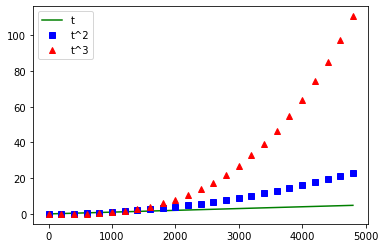

In [57]:
#plt.style.use('seaborn-whitegrid')
plt.plot(x,t,'-g', label='t')
plt.plot(x,t_2,'sb', label='t^2')
plt.plot(x,t_3,'^r', label='t^3')
plt.legend()
plt.show()

## 2.

In [58]:
# line 1
x1 = [10,20,30]
y1 = [20,40,10]
# line 2
x2 = [10,20,30]
y2 = [40,10,30]

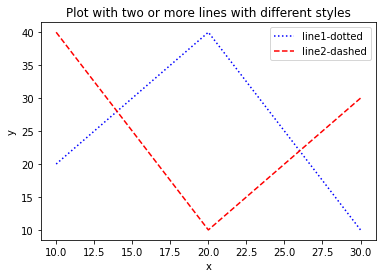

In [59]:
plt.plot(x1,y1,color='b',linestyle=":", label='line1-dotted')
plt.plot(x2,y2,color='r', linestyle="--", label='line2-dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot with two or more lines with different styles')
plt.legend()

## 3.

In [60]:
np.random.seed(0)
x = np.random.randint(0,100,50)

In [61]:
np.random.seed(1)
y = np.random.randint(0,100,50)

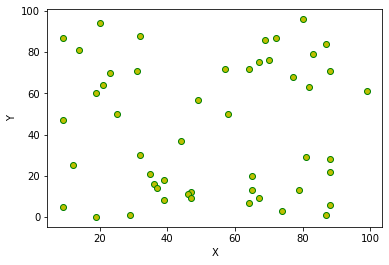

In [62]:
plt.scatter(x,y, edgecolors='g', facecolors='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 4.

In [63]:
a = [4,8,5,7,6]
b = [2,3,4,2,6]
c = [4,7,4,7,8]
d = [2,6,4,8,6]
e = [2,4,3,3,2]
data = [a,b,c,d,e]
df = pd.DataFrame(data=data,columns=['a','b','c','d','e'], index=pd.Index([i for i in range(2,11,2) ]))
df

,a,b,c,d,e
2,4,8,5,7,6
4,2,3,4,2,6
6,4,7,4,7,8
8,2,6,4,8,6
10,2,4,3,3,2


In [64]:
labels = df.index.values

In [65]:
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

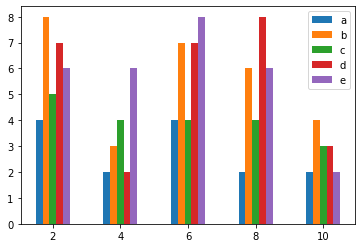

In [66]:
plt.bar(x-0.2, df['a'], width=width, label='a')
plt.bar(x-0.1, df['b'], width=width, label='b')
plt.bar(x, df['c'], width=width, label='c')
plt.bar(x+0.1, df['d'], width=width, label='d')
plt.bar(x+0.2, df['e'], width=width, label='e')
plt.xticks(x, labels)
plt.grid(False)
plt.legend()
plt.show()

## 5.

In [67]:
index = pd.date_range(start='2021-01', freq='M', periods=12)
index = index.month_name()

data = [0.70,0.75,1.85,2.93,3.05,2.02,1.93,1.62,1.84,1.31,1.39,0.84]

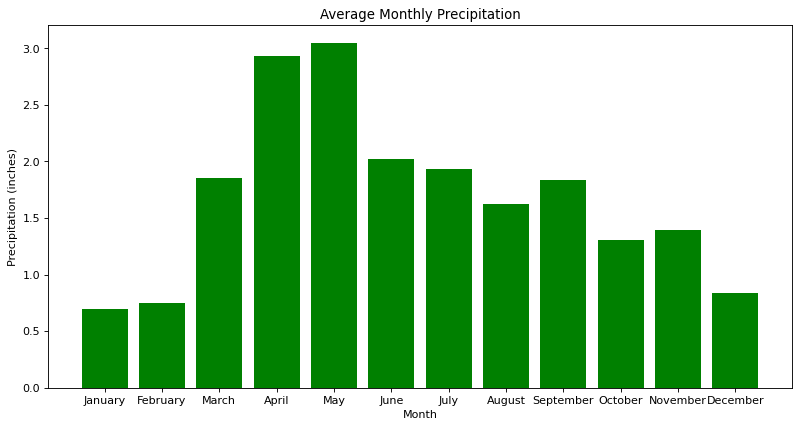

In [68]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
plt.bar(index, height=data, color='g')
plt.xlabel('Month')
plt.ylabel('Precipitation (inches)')
plt.title('Average Monthly Precipitation')
plt.grid(False)
plt.show()